In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


# Airline Flight Price Analysis

This project analyzes airline flight ticket prices to understand how different factors, such as arrival time, 
#impact pricing trends using Python data analysis and visualization techniques.

In [4]:
data=pd.read_csv("airlines_flights_data.csv")

In [5]:
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Exploratory Data Analysis (EDA)

EDA is performed to identify patterns and trends in flight pricing.
Visualizations help in understanding how prices vary across different arrival times.


In [7]:
#1.SHAPE

In [9]:
data.shape

(300153, 12)

In [10]:
#2.index

In [11]:
data.index

RangeIndex(start=0, stop=300153, step=1)

In [13]:
#3.info

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
#4.null values

In [18]:
data.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [19]:
#5.unique-shows the name of the airlines

In [155]:
data["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [24]:
data["airline"].nunique()# shows the number of the airlines

6

## Data Cleaning and Preprocessing

In this step:
- Missing values are checked and handled
- Data types are validated
- Relevant columns are selected for analysis

This ensures the dataset is clean and ready for analysis.


In [27]:
#remove the 'index'column'

In [29]:
data.drop(columns='index',inplace=True)

In [30]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [31]:
##get stastical summary about the dataset

In [33]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
#max Duration flight is Air india and chennai-bangalore 

In [36]:
data[data['duration']==49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [ ]:
#min Duration flight is indigo and Bangalore-chennai 

In [37]:
data[data['duration']==0.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498
116236,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,11,3498
116322,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,12,3498
116411,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,13,3498
116496,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,14,3498
116656,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,16,1924


In [38]:
#max price flight is Vistara

In [40]:
data[data['price']==123071.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [45]:
#min price flight is 3 flights-indigo,go first,airasia

In [44]:
data[data['price']==1105.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


In [49]:
data['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [50]:
# showing all the flights and the their number of flights in bar graph

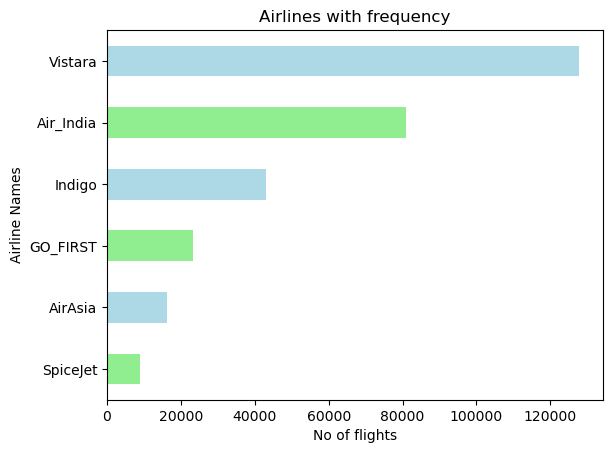

In [61]:
data['airline'].value_counts(ascending=True).plot.barh(color=['lightgreen','lightblue'])

plt.title("Airlines with frequency")

plt.xlabel("No of flights")

plt.ylabel("Airline Names")

plt.show()


In [62]:
#2.show bar graphs representing the departure time & arrival time

In [63]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [64]:
#showing departure time for the flights

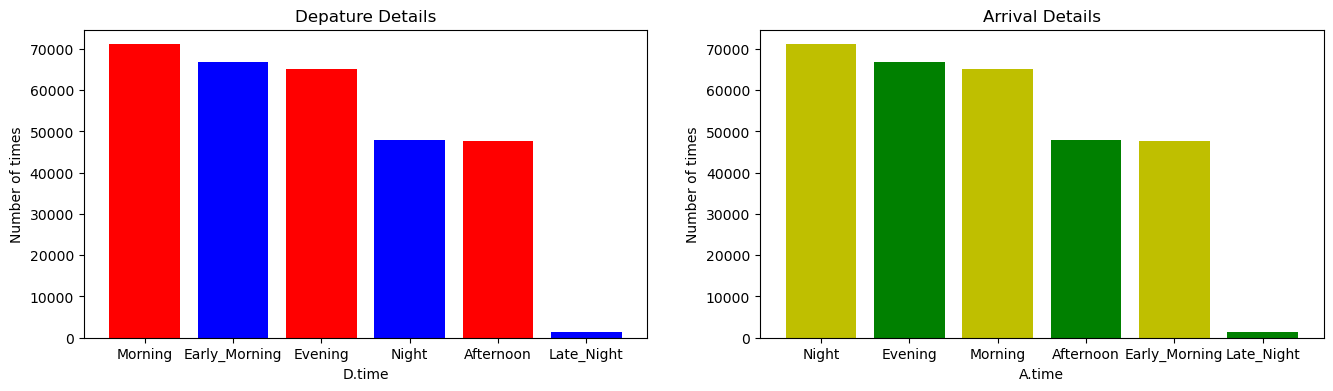

In [87]:

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

plt.bar(data['departure_time'].value_counts().index,data['departure_time'].value_counts().values,color=['r','b'])
plt.title("Depature Details")

plt.xlabel("D.time")

plt.ylabel("Number of times")
plt.subplot(1,2,2)
plt.bar(data['arrival_time'].value_counts().index,data['departure_time'].value_counts().values,color=['y','g'])
plt.title("Arrival Details")

plt.xlabel("A.time")

plt.ylabel("Number of times")
plt.show()

In [88]:
#Bar graph representing source city and destination city

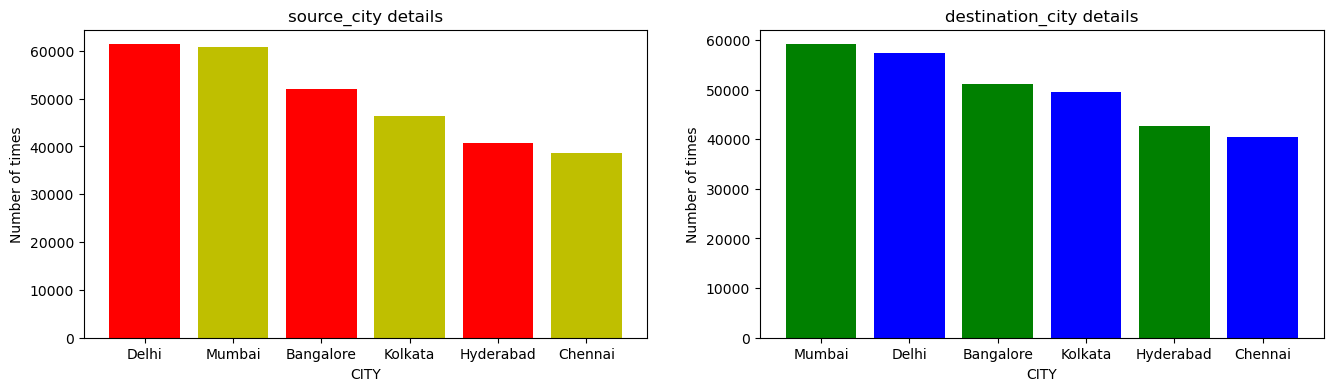

In [98]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

plt.bar(data['source_city'].value_counts().index,data['source_city'].value_counts().values,color=['r','y'])

plt.title("source_city details")

plt.xlabel("CITY")

plt.ylabel("Number of times")

plt.subplot(1,2,2)

plt.bar(data['destination_city'].value_counts().index,data['destination_city'].value_counts().values,color=['g','b'])

plt.title("destination_city details")

plt.xlabel("CITY")

plt.ylabel("Number of times")

plt.show()

In [99]:
#4.price varies with the airlines

In [104]:
data.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

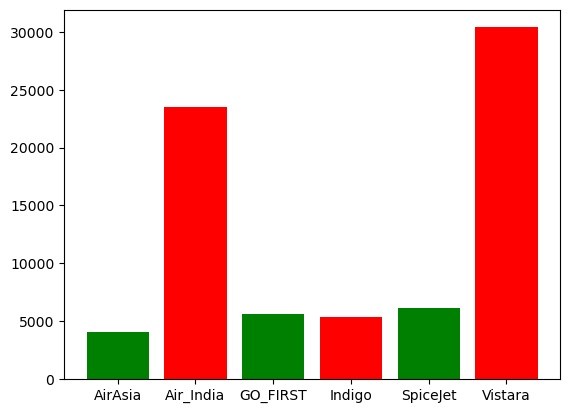

In [110]:
plt.bar(data.groupby('airline')['price'].mean().index,data.groupby('airline')['price'].mean().values,color=['g','r'])
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


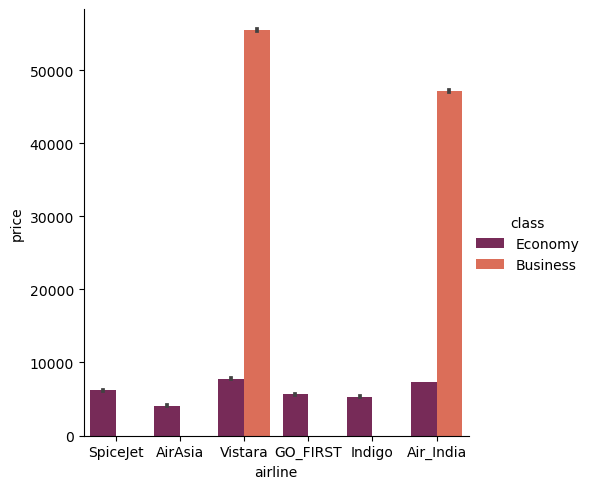

In [113]:
sns.catplot(x='airline',y='price',kind='bar',palette='rocket',data=data,hue='class')
plt.show()

In [114]:
#5.does ticket price change based on the depature time and arrival time?

In [115]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [116]:
data.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


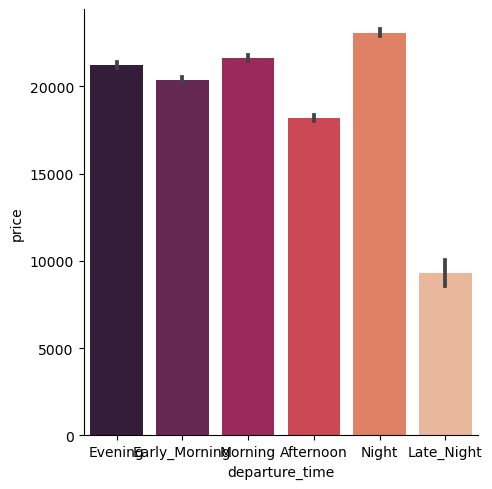

In [117]:
sns.catplot(x='departure_time',y='price',kind='bar',palette='rocket',data=data)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


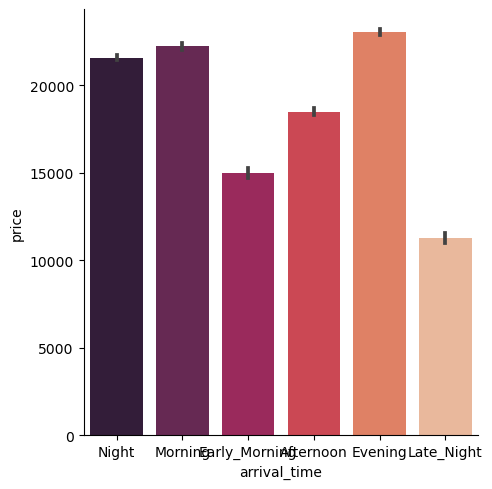

In [122]:
sns.catplot(x='arrival_time',y='price',kind='bar',palette='rocket',data=data)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


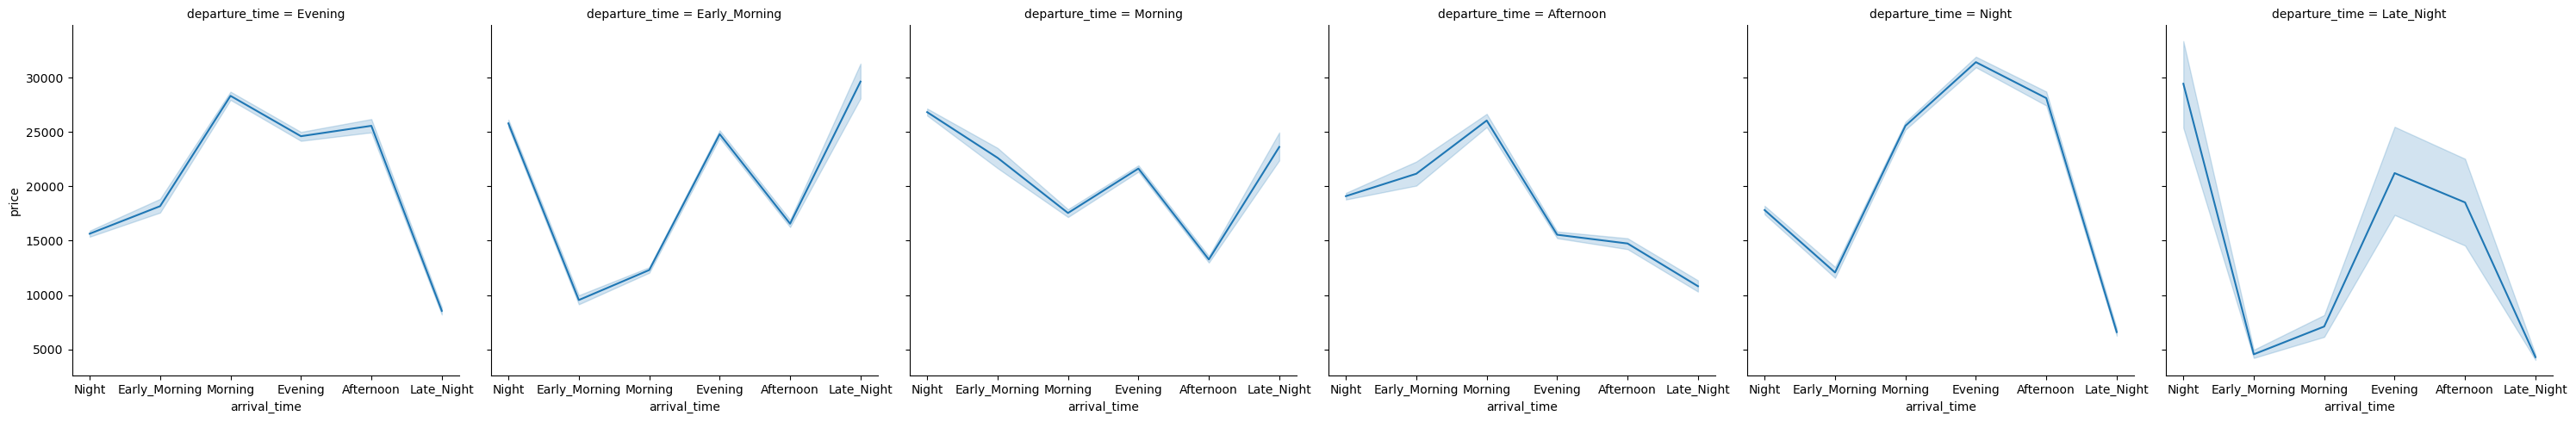

In [125]:
sns.relplot(x='arrival_time',y='price',kind='line',col="departure_time",data=data)
plt.show()

In [ ]:
#6.how the price changes with change in source and destination

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


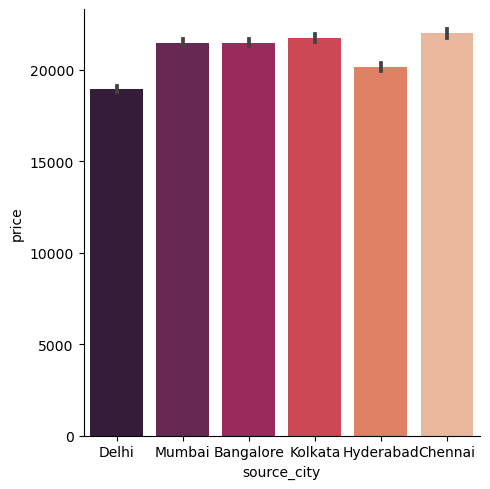

In [127]:
sns.catplot(x='source_city',y='price',kind='bar',data=data,palette='rocket',color=['r','g'])

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


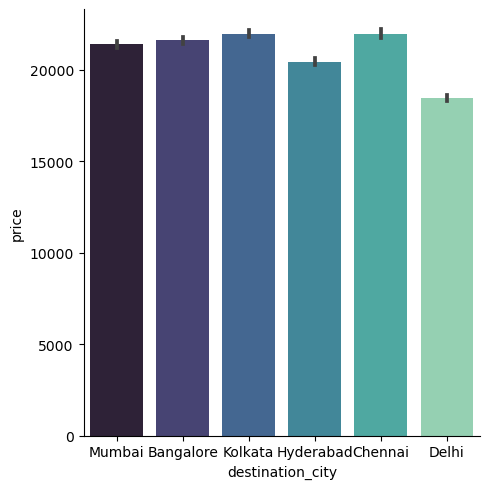

In [131]:
sns.catplot(x='destination_city',y='price',kind='bar',data=data,palette='mako')

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


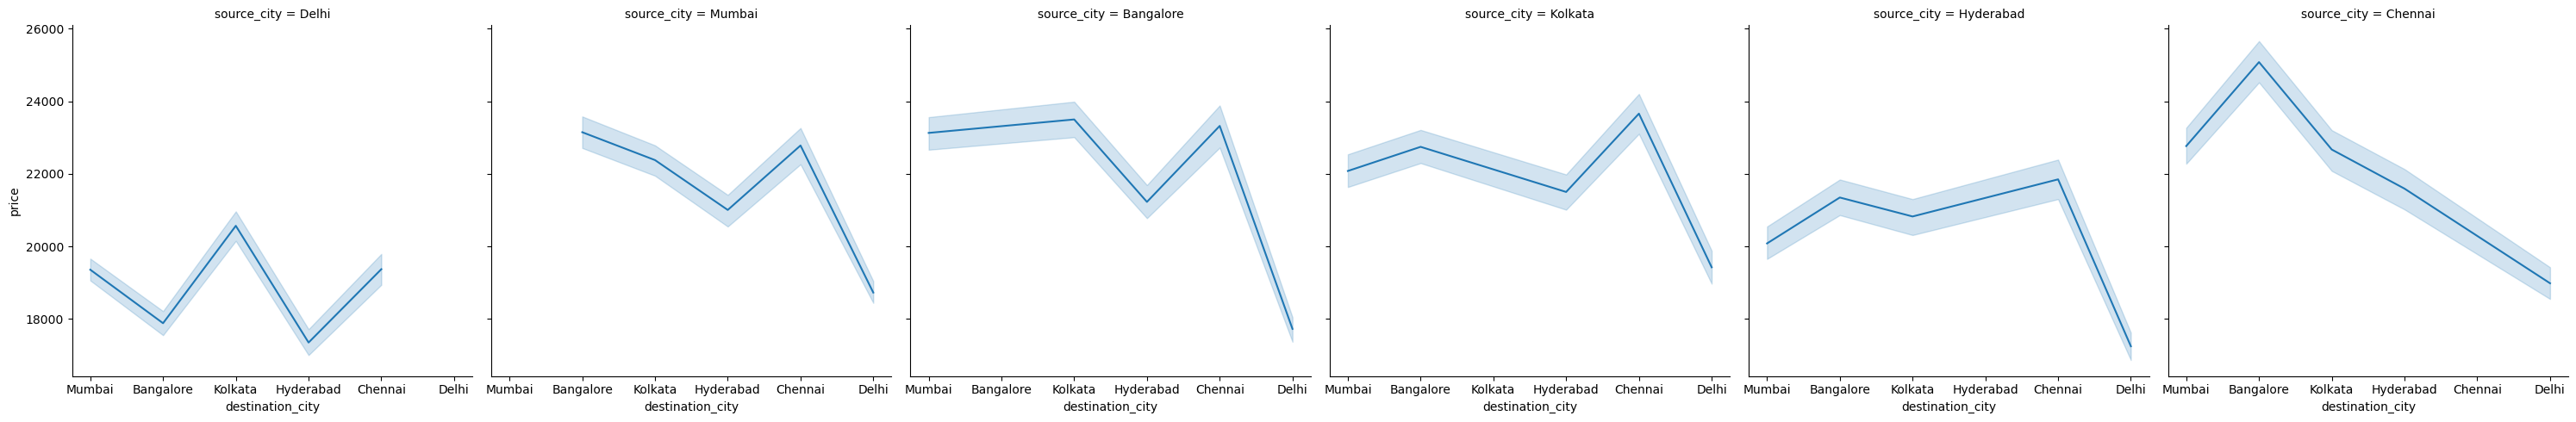

In [138]:
sns.relplot(x='destination_city',y='price',col='source_city',kind='line',data=data)
plt.show()

In [139]:
#7.how is the price affected when tickets are bought in just 1 or 2 days before departure

In [140]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


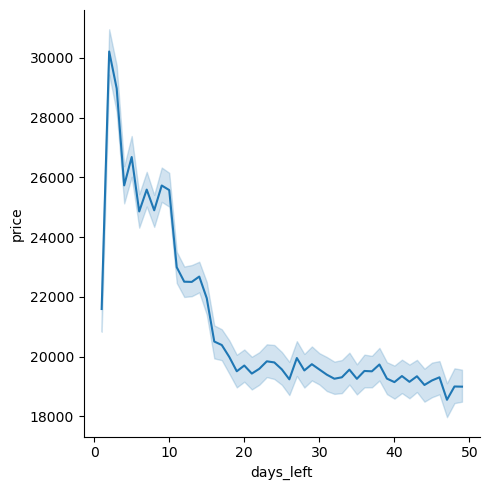

In [147]:
sns.relplot(x='days_left',y='price',kind='line',data=data)#when the 2 days left there are increase in price.

In [142]:
data.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

In [148]:
#8.ticket price vary between economy and business class

In [149]:
data.groupby('class')['price'].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


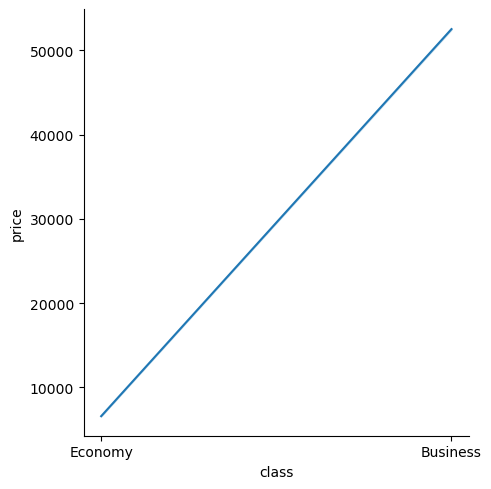

In [150]:
sns.relplot(x='class',y='price',kind='line',data=data)

In [151]:
#9.what will be the avg price of vistara airline for a flight from delhi to hyderabad in business class

In [154]:
data[(data['source_city']=='Delhi' ) &(data['destination_city']=='Hyderabad')&(data['class']=='Business') & 
    (data['airline']=='Vistara')]['price'].mean()

47939.840361445786

## Key Insights

Flight prices vary noticeably across different arrival times
Certain arrival periods tend to have higher average ticket prices
Visualization helps in quickly identifying pricing patterns


## Key Insights
- Evening flights tend to be priced higher on average
- Certain arrival times show consistent price patterns

## Conclusion
This analysis helps airlines and customers understand pricing behavior based on flight schedules.

